# Pandas - Cleansing Data

## 1. 결측치

1. 결측치 : 비어있는 값. 분석 결과 왜곡
2. 결측치 처리 
    1) 행 제거 
    2) 값을 채워넣음(대표값 또는 예측값으로)

In [1]:
import pandas as pd 

age      = pd.Series([ None,  42, 27,  25,  20]  ) 
score    = pd.Series([3.8, 4.2, 2.6, 1.0, 3.0] ) 
salary =  pd.Series([2700,4000,3000,2700,3200])  
stu_class = pd.Categorical([ 1, 1, 2, None, 2])   # None 결측치 
gender    = pd.Categorical([ 'F', 'M', 'M', 'M', None ])   # None 결측치 

In [2]:
df = pd.DataFrame ( {'age': age, 
                     'score' :  score  ,
                     'salary' : salary,
                      'class' :stu_class,
                       'gender' : gender}
)

df

,age,score,salary,class,gender
0,NaN,3.8,2700,1,F
1,42.0,4.2,4000,1,M
2,27.0,2.6,3000,2,M
3,25.0,1.0,2700,NaN,M
4,20.0,3.0,3200,2,NaN


In [3]:
# df 복제 

df_new = df.copy()  

### (1) 결측치 확인

In [4]:
#데이터프레임의 모든 값이 boolean 형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수
pd.isna(df_new)

,age,score,salary,class,gender
0,True,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,True


In [6]:
# 열별로 결측치 갯수 확인 
df_new.isnull().sum() 

age       1
score     0
salary    0
class     1
gender    1
dtype: int64

### (2) 결측치 제거

In [7]:
#결측치를 가지고 있는 행들을 삭제 
df_new = df_new.dropna(how='any')
df_new

,age,score,salary,class,gender
1,42.0,4.2,4000,1,M
2,27.0,2.6,3000,2,M


### (3) 결측치 변경

In [8]:
# df 복제 
df_new = df.copy() 

In [9]:
# age 열의 결측치를 다른 값으로 채우기 (대표값 또는 예측값을 구한 후)
df_new["age"] = df_new["age"].fillna(value=30)
df

,age,score,salary,class,gender
0,NaN,3.8,2700,1,F
1,42.0,4.2,4000,1,M
2,27.0,2.6,3000,2,M
3,25.0,1.0,2700,NaN,M
4,20.0,3.0,3200,2,NaN


In [13]:
df_new["age"] = df_new["age"].mean()

df_new

,age,score,salary,class,gender
0,28.8,3.8,2700,1,F
1,28.8,4.2,4000,1,M
2,28.8,2.6,3000,2,M
3,28.8,1.0,2700,NaN,M
4,28.8,3.0,3200,2,NaN


## 2. 이상치

1. 이상치 :극단적인 값 또는 존재할 수 없는 값
2. 이상치 처리
    1) 행 제거
    2) 값을 채워넣음(대표값 또는 예측값으로)

## (1) 이상치 확인

In [28]:
import pandas as pd 

df = pd.read_csv("data/students.csv")
df

,english,math,class
0,100,999,1
1,90,90,1
2,80,80,1
3,70,20,1
4,20,90,2
5,90,100,2
6,80,80,2
7,90,99,A


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   english  8 non-null      int64 
 1   math     8 non-null      int64 
 2   class    8 non-null      object
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


## (1) 범주형 변수의  이상치 확인

* 1반과 2반만 존재하는 학교라고 가정하면,
* 1과 2외의 데이터는 이상치 

In [34]:
# 클래스 열의 값이 1 또는 2인 행만 
df["class"].isin(['1','2'])
# df[ df["class"].isin(['1','2'])  ]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7    False
Name: class, dtype: bool

In [35]:
# 클래스 열의 값이 1 또는 2가 아닌 행만 <--- 이상치 
~  df["class"].isin(['1','2'])
#df[ ~  df["class"].isin(['1','2'])  ]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
Name: class, dtype: bool

## (2) 범주형 변수의  이상치 제거

In [37]:
df = df[ df["class"].isin(['1','2'])  ]
df

,english,math,class
0,100,999,1
1,90,90,1
2,80,80,1
3,70,20,1
4,20,90,2
5,90,100,2
6,80,80,2


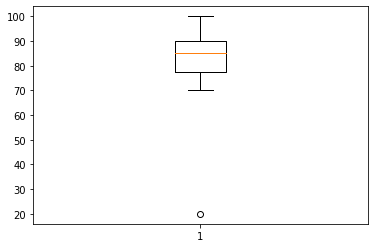

In [40]:
# box plot
import matplotlib.pyplot as plt 
%matplotlib inline 


a =plt.boxplot(students['english'])
plt.show()